In [ ]:
import pandas as pd

In [ ]:
# chargement des données
nosPokemons = pd.read_csv("/content/data/pokedex.csv")
print(nosPokemons.columns.values)
print(nosPokemons.head(10))

['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'POINTS_ATTAQUE'
 'POINTS_DEFENSE' 'POINTS_ATTAQUE_SPECIALE' 'POINTS_DEFENSE_SPECIALE'
 'POINTS_VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']
   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  POINTS_ATTAQUE  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salameche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     N

In [ ]:
# Transformation de la colonne LEGENDAIRE en entier 0= FAUX et l=VRAI
nosPokemons ['LEGENDAIRE'] = (nosPokemons['LEGENDAIRE'] == 'VRAI').astype(int)
print(nosPokemons['LEGENDAIRE'].head(800))

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: LEGENDAIRE, Length: 800, dtype: int64


In [ ]:
#Comptage du nombre d'observations et de features
print(nosPokemons.shape)

#Informations sur notre jeu de données
print(nosPokemons.info())

(800, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      800 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   POINTS_ATTAQUE           800 non-null    int64 
 6   POINTS_DEFENSE           800 non-null    int64 
 7   POINTS_ATTAQUE_SPECIALE  800 non-null    int64 
 8   POINTS_DEFENSE_SPECIALE  800 non-null    int64 
 9   POINTS_VITESSE           800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB
None


In [ ]:
print(nosPokemons['NOM'] [62])

Colossinge


In [ ]:
#Chargement des données des combats
combats = pd.read_csv("/content/data/combats.csv")

#Affichage des colonnes du Dataframe
print(combats.columns.values)

#Affichage des 10 premières lignes du Dataframe
print(combats.head(10))

#Comptage du nombre de lignes et de colonnes
print(combats.shape)

#Informations sur notre jeu de données
print(combats.info())

['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']
   Premier_Pokemon  Second_Pokemon  Pokemon_Gagnant
0              266             298              298
1              702             701              701
2              191             668              668
3              237             683              683
4              151             231              151
5              657             752              657
6              192             134              134
7               73             545              545
8              220             763              763
9              302              31               31
(50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1

In [ ]:
# nombre de combats d'un pokemon
nbFoisPremierePosition = combats.groupby('Premier_Pokemon').count()
print(nbFoisPremierePosition)

nbFoisSecondePosition = combats.groupby('Second_Pokemon').count()
print(nbFoisSecondePosition)

nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
print(nombreTotalDeCombats)

                 Second_Pokemon  Pokemon_Gagnant
Premier_Pokemon                                 
1                            70               70
2                            55               55
3                            68               68
4                            62               62
5                            50               50
...                         ...              ...
796                          49               49
797                          64               64
798                          60               60
799                          75               75
800                          61               61

[784 rows x 2 columns]
                Premier_Pokemon  Pokemon_Gagnant
Second_Pokemon                                  
1                            63               63
2                            66               66
3                            64               64
4                            63               63
5                            62              

In [ ]:
# nombre de combats gagnés par un pokemon
nombreDeVictoires = combats.groupby('Pokemon_Gagnant').count()
print(nombreDeVictoires)
print(nombreDeVictoires.info())

                 Premier_Pokemon  Second_Pokemon
Pokemon_Gagnant                                 
1                             37              37
2                             46              46
3                             89              89
4                             70              70
5                             55              55
...                          ...             ...
796                           39              39
797                          116             116
798                           60              60
799                           89              89
800                           75              75

[783 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 1 to 800
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  783 non-null    int64
 1   Second_Pokemon   783 non-null    int64
dtypes: int64(2)
memory usage: 18.4 KB
None


In [ ]:
#On crée une liste à partir d ' une extraction pour obtenir la liste des Pokémons , que l ' on trie par numéro
#Cette liste de numéros nous permettra de réaliser l ' agrégationdes données
listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger.sort_index()
#On ajoute le nombre de combats
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant
#On ajoute le nombre de victoires
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon
#On calcule le pourcentage de victoires
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon/(nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant)
#On affiche la nouvelle liste
print(listeAAgreger)

                 Premier_Pokemon  Second_Pokemon  NBR_COMBATS  NBR_VICTOIRES  \
Pokemon_Gagnant                                                                
1                             37              37          133             37   
2                             46              46          121             46   
3                             89              89          132             89   
4                             70              70          125             70   
5                             55              55          112             55   
...                          ...             ...          ...            ...   
796                           39              39          105             39   
797                          116             116          131            116   
798                           60              60          119             60   
799                           89              89          144             89   
800                           75        

In [ ]:
# agréger la liste avec le dataframe nosPokemons
nouveauPokedex = nosPokemons.merge(listeAAgreger , left_on = 'NUMERO', right_index = True , how = 'left')
print(nouveauPokedex)

     NUMERO              NOM TYPE_1   TYPE_2  POINTS_DE_VIE  POINTS_ATTAQUE  \
0         1       Bulbizarre  Herbe   Poison             45              49   
1         2       Herbizarre  Herbe   Poison             60              62   
2         3       Florizarre  Herbe   Poison             80              82   
3         4  Mega Florizarre  Herbe   Poison             80             100   
4         5        Salameche    Feu      NaN             39              52   
..      ...              ...    ...      ...            ...             ...   
795     796          Diancie  Roche      F�e             50             100   
796     797     Mega Diancie  Roche      F�e             50             160   
797     798    Hoopa confin�    Psy  Spectre             80             110   
798     799    Hoopa non li�    Psy   Obscur             80             160   
799     800        Volcanion    Feu      Eau             80             110   

     POINTS_DEFENSE  POINTS_ATTAQUE_SPECIALE  POINT

In [ ]:
print(nouveauPokedex.describe())

         NUMERO  POINTS_DE_VIE  POINTS_ATTAQUE  POINTS_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       POINTS_ATTAQUE_SPECIALE  POINTS_DEFENSE_SPECIALE  POINTS_VITESSE  \
count               800.000000               800.000000      800.000000   
mean                 72.820000                71.902500       68.277500   
std                  32.722294                27.828916       29.060474   
min                  10.000000                20.000000        5.000000   
25%                  49.750000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

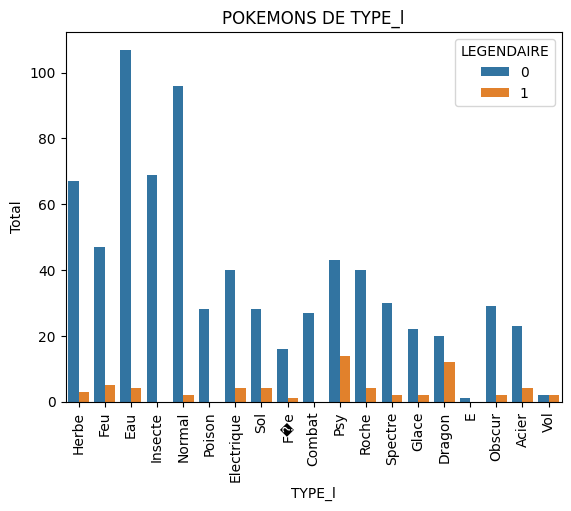

In [ ]:
axe_X = sns.countplot(x="TYPE_1", hue = "LEGENDAIRE", data = nouveauPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_l')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_l")
plt.show()

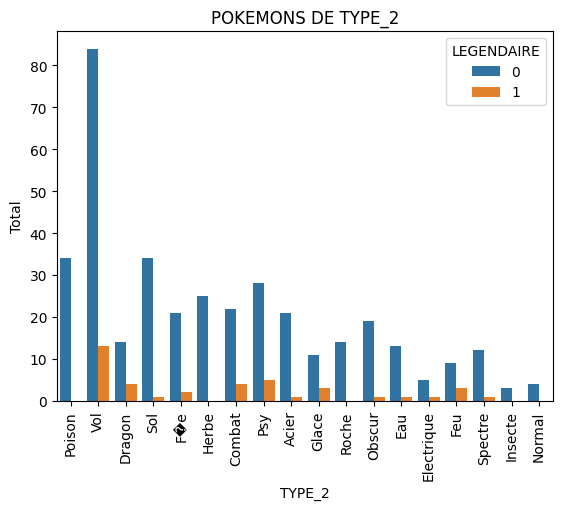

In [ ]:
axe_X = sns.countplot(x="TYPE_2", hue = "LEGENDAIRE", data = nouveauPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_2')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_2")
plt.show()

In [ ]:
print(nouveauPokedex.groupby('TYPE_1').agg({ "POURCENTAGE_DE_VICTOIRES": "mean" }).sort_values(by ="POURCENTAGE_DE_VICTOIRES"))

            POURCENTAGE_DE_VICTOIRES
TYPE_1                              
F�e                         0.329300
E                           0.343750
Roche                       0.404852
Acier                       0.424529
Poison                      0.433262
Insecte                     0.439006
Glace                       0.439604
Herbe                       0.440364
Eau                         0.470520
Combat                      0.475616
Spectre                     0.484027
Normal                      0.535578
Sol                         0.541526
Psy                         0.545747
Feu                         0.579215
Obscur                      0.629726
Electrique                  0.632861
Dragon                      0.633587
Vol                         0.765061


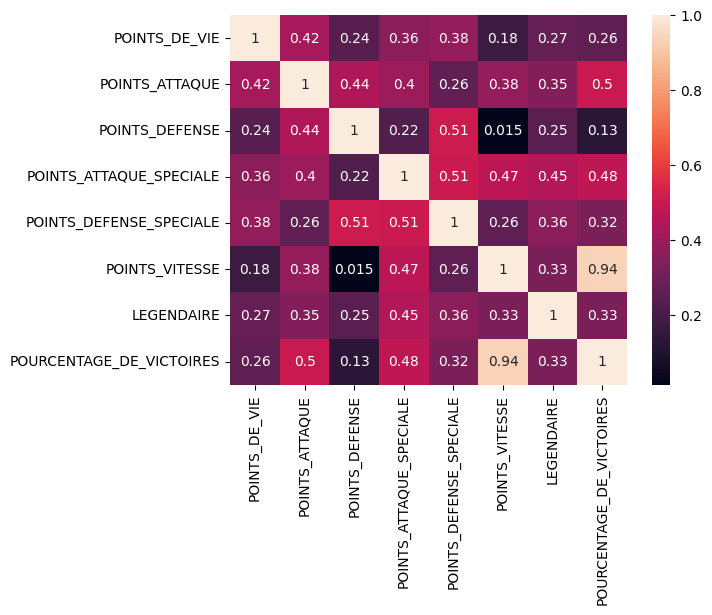

In [ ]:
# corrélation entre les features
corr = nouveauPokedex.loc[:, ['POINTS_DE_VIE', 'POINTS_ATTAQUE', 'POINTS_DEFENSE', 'POINTS_ATTAQUE_SPECIALE', 'POINTS_DEFENSE_SPECIALE', 'POINTS_VITESSE', 'LEGENDAIRE', 'POURCENTAGE_DE_VICTOIRES']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [ ]:
#Sauvegarde du Dataframe Pokedex
dataset = nouveauPokedex
dataset.to_csv("/content/data/dataset.csv", sep ='\t')